In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
import numpy as np

In [ ]:
DATA_DIR = '../data/asl_alphabet_train/asl_alphabet_train'
TEST_DATA_DIR = '../data/asl_alphabet_test/asl_alphabet_test'

IMAGE_SIZE = (96, 96) 
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.2
SEED = 123

In [ ]:
print("Creating Training Dataset...")

train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=VALIDATION_SPLIT,
    subset="training",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

print("Creating Validation Dataset...")

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=VALIDATION_SPLIT,
    subset="validation",
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='categorical'
)

print("Creating Test Dataset...")

class_names = train_ds.class_names
print(f"Found {len(class_names)} classes: {class_names}")

Creating Training Dataset...
Found 86912 files belonging to 29 classes.
Using 69530 files for training.
Creating Validation Dataset...
Found 86912 files belonging to 29 classes.
Using 17382 files for validation.
Creating Test Dataset...
Found 29 classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [ ]:
print("Defining augmentation and normalization layers...")

data_augmentation = tf.keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
        layers.RandomTranslation(0.1, 0.1),
        layers.RandomContrast(0.1),
    ],
    name="data_augmentation"
)

normalization_layer = layers.Rescaling(1./255) 

Defining augmentation and normalization layers...


In [ ]:
print("Applying processing and optimizing datasets...")

train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=tf.data.AUTOTUNE)

val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=tf.data.AUTOTUNE)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

print("Data processing pipeline complete and optimized.")

Applying processing and optimizing datasets...
Data processing pipeline complete and optimized.


Displaying augmented training batch...


2025-10-18 17:31:49.547902: W tensorflow/core/kernels/data/cache_dataset_ops.cc:917] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


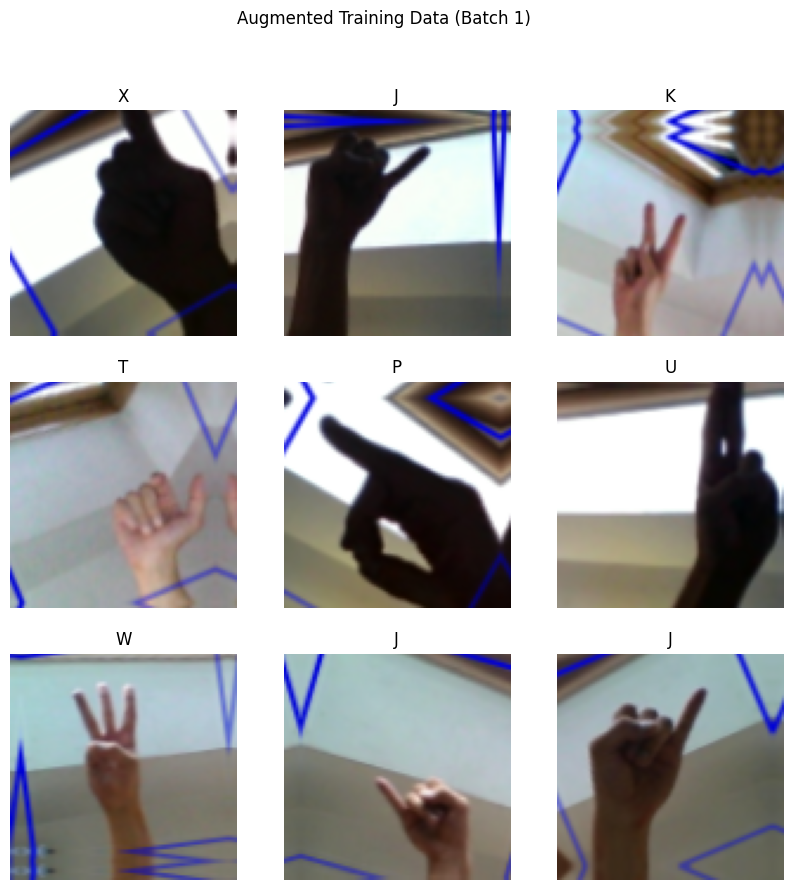

2025-10-18 17:31:49.705351: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-10-18 17:31:49.722617: W tensorflow/core/kernels/data/cache_dataset_ops.cc:917] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Displaying un-augmented validation batch...


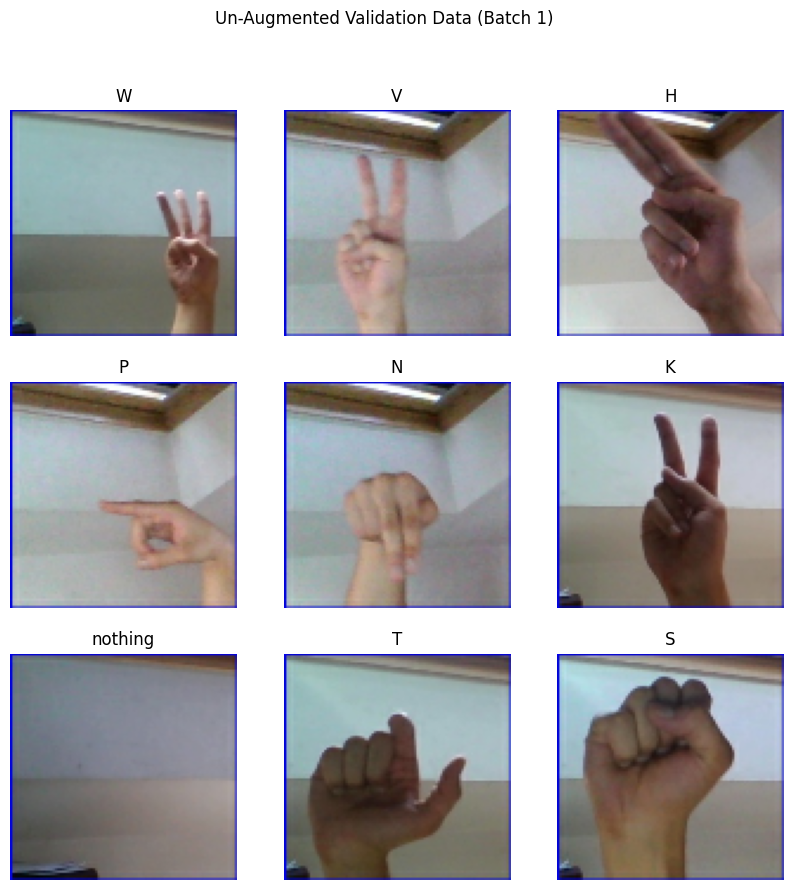

2025-10-18 17:31:49.838989: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [ ]:
print("Displaying augmented training batch...")

for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    plt.suptitle("Augmented Training Data (Batch 1)")
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy()) 
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    plt.show()

print("Displaying un-augmented validation batch...")

for images, labels in val_ds.take(1):
    plt.figure(figsize=(10, 10))
    plt.suptitle("Un-Augmented Validation Data (Batch 1)")
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    plt.show()